In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
# from google.colab import drive
# drive.mount('/content/drive')

In [32]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/WeatherHistory/weatherHistory.csv')
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


### Preprocesssing data

In [33]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].map(lambda date : date.year)
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006


In [34]:
# covnert date to day of year

data['Day of Year'] = data['Formatted Date'].dt.dayofyear
data['Day of Year'].head(2)

0    90
1    90
Name: Day of Year, dtype: int64

In [35]:
# mean of temperature in each day

mean_day_temperature = data.groupby(['Day of Year', 'Year'])['Temperature (C)'].mean().reset_index()
mean_day_temperature.head()

,Day of Year,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407


Text(0, 0.5, 'Temperature (C)')

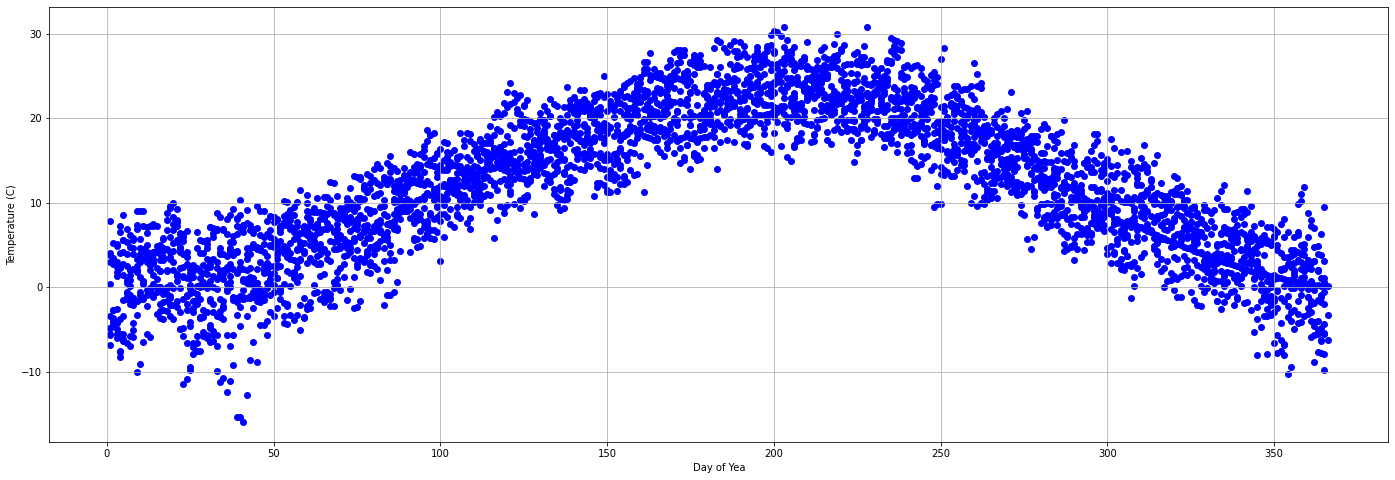

In [36]:
X = mean_day_temperature['Day of Year'].to_numpy()
Y = mean_day_temperature['Temperature (C)'].to_numpy()

plt.figure(figsize = (24, 8))
plt.scatter(X, Y, marker = '.', linewidths = 4, c = 'b')
plt.grid()
plt.xlabel('Day of Yea')
plt.ylabel('Temperature (C)')

### Perceptron class, fit, predict and evaluation

In [37]:
# train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train=X_train.reshape(-1,1)
X_val=X_val.reshape(-1,1)


print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(3215, 1) (804, 1) (3215,) (804,)


In [38]:
model = tf.keras.models.Sequential([
                Dense(16, input_dim = 1, activation='relu'), 
                Dense(32, activation='relu'),
                Dense(64, activation='relu'),
                Dense(128, activation='relu'),
                Dense(64, activation='relu'),
                Dense(32, activation='relu'),
                Dense(1, activation='linear'),
])

In [ ]:
epochs = 100
lr = 0.0001

model.compile(loss=tf.keras.losses.MeanAbsoluteError(reduction="auto"),
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
                             )
model.fit(X_train, Y_train, epochs=100)



In [40]:
model.evaluate(X_test, Y_test)

26/26 [==============================] - 0s 1ms/step - loss: 3.0455


3.0455291271209717